# Lab 5- Deep Learning Model

This lab is meant to get you started in using Keras to design Deep Neural Networks. The goal here is to simply repeat Lab 4, but with DNNs.

Let's start with reading the data, like before:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename="/data/afarbin/DLClass/SUSY/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi"]
FeatureNames=[ "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

ImportError: No module named pandas

Now lets define training and test samples. Note that DNNs take very long to train, so for testing purposes we will use only about 10% of the 5 million events in the training/validation sample. Once you get everything working, make the final version of your plots with the full sample. 

Also note that Keras had trouble with the Pandas tensors, so after doing all of the nice manipulation that Pandas enables, we convert the Tensor to a regular numpy tensor.

In [9]:
N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])


Now lets setup everything. Note that you will need to use a GPU to get reasonable training times. The Jupyter server will have up tp 4 GPUs in it. Your Jupyter session is now running through a batch queue system that effectively assigns a GPU to you. Here we tell Keras's backend, Theano, to use the GPU assigned to you.

In [10]:
import os 
print "Using Queue:", os.environ["PBS_QUEUE"]
gpuid=int(os.environ["PBS_QUEUE"][3:4])
print "Using GPU:", gpuid
os.environ['THEANO_FLAGS'] = "mode=FAST_RUN,device=gpu%s,floatX=float32,force_device=True" % (gpuid)

Using Queue: gpu1oscar
Using GPU: 1


There was some problem getting the profiler to work in this notebook, so we turn it off: 

In [11]:
import theano
theano.config.profile=False

Now we will build a simple model, as described in class. Note that this is very small model, so things run fast. You should attempt more ambitious models.

In [12]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=X_Train.shape[1], init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

In [1]:

import keras
grapher = keras.utils.dot_utils.Grapher()

Using Theano backend.


AttributeError: 'module' object has no attribute 'dot_utils'

The model has to be compiled. At this time we set the loss function and the optimizer too:

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 12)            228         dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 8)             104         dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 1)             9           dense_2[0][0]                    
Total params: 341
____________________________________________________________________________________________________


Now we train. We are running only 10 epochs in this example. Models may need hundreds of epochs before they stop improving.

In [22]:
history=model.fit(X_Train, y_Train, validation_data=(X_Test,y_Test), nb_epoch=10, batch_size=2048)

Train on 500000 samples, validate on 50000 samples
Epoch 1/10
500000/500000 [==============================] - 1s - loss: 0.4365 - acc: 0.7986 - val_loss: 0.4416 - val_acc: 0.7936

The model history keeps track of the loss and accuracy for each epoch. Note that the training above was setup to run on the validation sample at the end of each epoch:

In [23]:
print history.history

{'acc': [0.79864199998474117, 0.79881600001144404, 0.79891400000762935, 0.79916799999618526, 0.79905799998855587, 0.7992299999847412, 0.79942200001144414, 0.79925800001525882, 0.79944000001144411, 0.79925200000762942], 'loss': [0.43649456405830384, 0.43623138024711611, 0.43604246685600279, 0.4356315309753418, 0.43549236261177066, 0.43540091397285463, 0.43531243373870848, 0.43513101745414734, 0.43495590872383116, 0.43499206146049502], 'val_acc': [0.79360000015258791, 0.79594000022888178, 0.79545999977111814, 0.79580000041961674, 0.79642000032424931, 0.79559999996185304, 0.79658000041961674, 0.79600000032424922, 0.79624000041961673, 0.79601999986648564], 'val_loss': [0.44162241079330444, 0.43907877056121825, 0.4392397303581238, 0.43915408283233642, 0.43853710704803467, 0.43965958761215213, 0.43818180534362794, 0.43810968122482302, 0.4380726466560364, 0.43806821613311769]}


## Exercise 5.1

You will need to create several models and make sure they are properly trained. Write a function that takes this history and plots the values versus epoch. For every model that you train in the remainder of this lab, assess:

    * Has you model's performance plateaued? If not train for more epochs. 

    * Compare the performance on training versus test sample. Are you over training?

In [ ]:
## Your Solution Here


We can evaluate how the trained model does on the test sample as follows:

In [19]:
scores = model.evaluate(X_Test, y_Test)
print scores

49824/50000 [============================>.] - ETA: 0s

And we can make ROC curves as before:

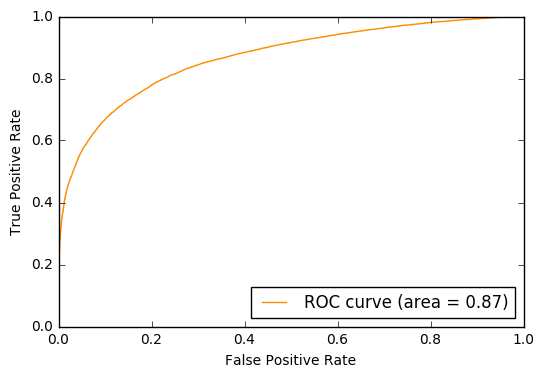

In [20]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, model.predict(X_Test))
                        
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Exercise 5.2

Following lab 4, make a comparison of the performance between models trained with raw, features, and raw+features data.

In [ ]:
## Your solution here


## Exercise 5.3

Again, following lab 4, design and implement at least 3 different DNN models. Train them and compare performance. You may try different architectures, loss functions, and optimizers to see if there is an effect.

In [24]:
## Your solution here

## Honors Problem- Exercise 5.4

Write a function that evaluates the performance (AUC) as a function of a given input variable. You will need to bin the test data in the variable (i.e. make sub-samples for events which have the particular variable in a range), evaluate the performance in each bin, and plot the results.

Apply your function to each input variable.